In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data=pd.read_csv('ETH_1H.csv',parse_dates=['Date'],index_col=['Date']) # string to time series format

In [3]:
data.head()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2020-04-16 00:00:00,1586995200000,ETHUSD,152.94,152.94,150.39,150.39,650.188125
2020-04-15 23:00:00,1586991600000,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2020-04-15 22:00:00,1586988000000,ETHUSD,157.18,157.30,155.32,155.81,106.337279
2020-04-15 21:00:00,1586984400000,ETHUSD,158.04,158.31,157.16,157.18,55.244131
2020-04-15 20:00:00,1586980800000,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [4]:
data=data.sort_index()

In [5]:
data.head(-5)

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2016-05-09 13:00:00,1462798800,ETHUSD,0.00,12.00,0.00,9.55,432.562115
2016-05-09 14:00:00,1462802400,ETHUSD,9.55,10.00,9.55,10.00,235.774075
2016-05-09 15:00:00,1462806000,ETHUSD,10.00,10.00,9.99,9.99,10.973567
2016-05-09 16:00:00,1462809600,ETHUSD,9.99,9.99,9.79,9.83,62.379450
2016-05-09 17:00:00,1462813200,ETHUSD,9.83,9.83,9.48,9.49,329.553213
...,...,...,...,...,...,...,...
2020-04-15 15:00:00,1586962800000,ETHUSD,157.12,157.15,155.81,155.81,303.839541
2020-04-15 16:00:00,1586966400000,ETHUSD,155.81,157.52,155.74,157.12,430.083035
2020-04-15 17:00:00,1586970000000,ETHUSD,157.12,157.78,156.90,157.48,156.552221


In [6]:
data.shape

(34497, 7)

In [7]:
data.isnull().sum()

Unix Timestamp    0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data=data.drop(columns=['Unix Timestamp','Symbol'])

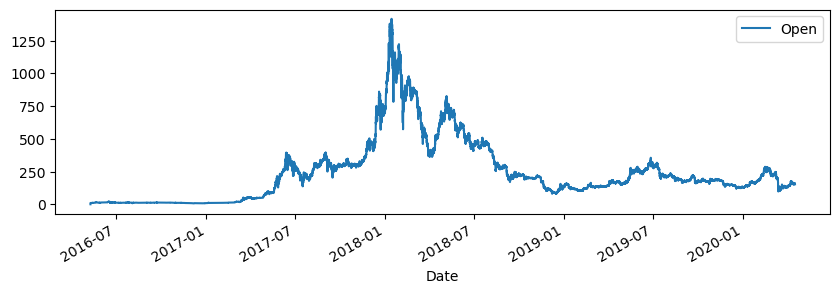

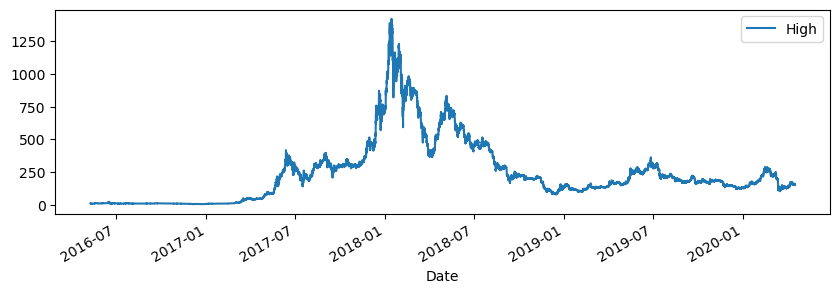

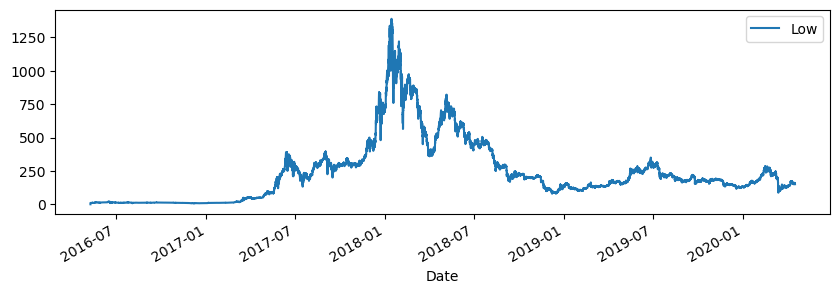

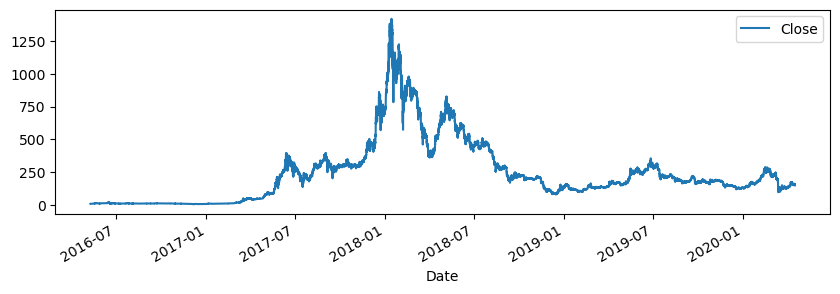

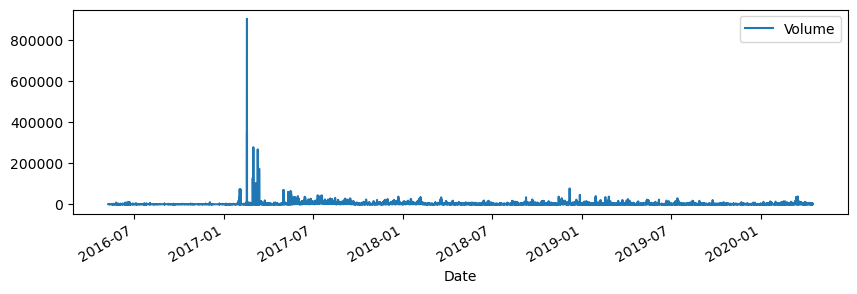

In [10]:
for i in data:
    plt.figure(figsize=(10,3))
    data[i].plot(legend=i)
    plt.show()

In [11]:
#creating the datatime feature
def create_f(df):
    df = df.copy()
    df['hour']=df.index.hour
    df['day']=df.index.day
    df['month']=df.index.month
    df['year']=df.index.year
    df['dayofweek']=df.index.dayofweek
    df['dayofyear']=df.index.dayofyear
    df['weekofyear']=df.index.isocalendar().week
    
    return df

In [12]:
df=create_f(data)

In [13]:
df.head()

,Open,High,Low,Close,Volume,hour,day,month,year,dayofweek,dayofyear,weekofyear
Date,,,,,,,,,,,,
2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,13,9,5,2016,0,130,19
2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,14,9,5,2016,0,130,19
2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,15,9,5,2016,0,130,19
2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,16,9,5,2016,0,130,19
2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,17,9,5,2016,0,130,19


<Axes: >

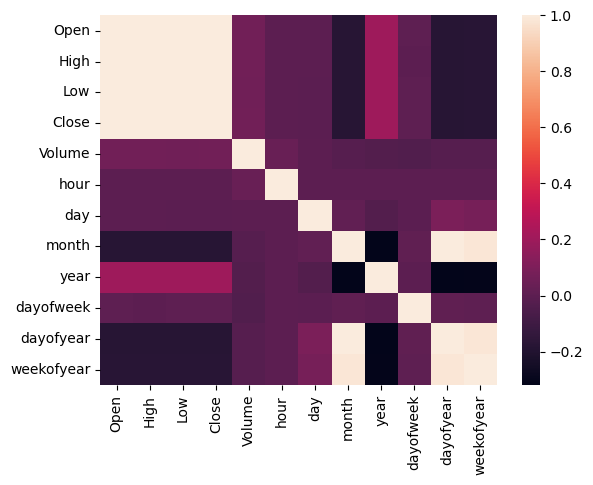

In [14]:
#correlation
sns.heatmap(df.corr())

In [15]:
#generating windows
# 24 hour window to predict 25th hour using only close

close = df.iloc[:,3]
windows=[]
target=[]
length=240
for i in (range(len(close)-length)):
    x=close.iloc[i:i+length]
    y=close.iloc[i+length]
    windows.append(x)
    target.append(y)
    
windows=np.array(windows)
target=np.array(target).reshape(-1,1)

In [16]:
#creating train and test data

from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
windows_sc=sc.fit_transform(windows)
target_sc=sc.fit_transform(target)

windows_sc=windows_sc.reshape((len(windows_sc),length,1))


In [17]:
split = int(0.8 * len(windows_sc))
X_train = windows_sc[:split, :, :]
X_test = windows_sc[split:, :, :]
Y_train = target_sc[:split, :]
Y_test = target_sc[split:, :]

In [18]:
print(X_train.shape,Y_train.shape)

(27405, 240, 1) (27405, 1)


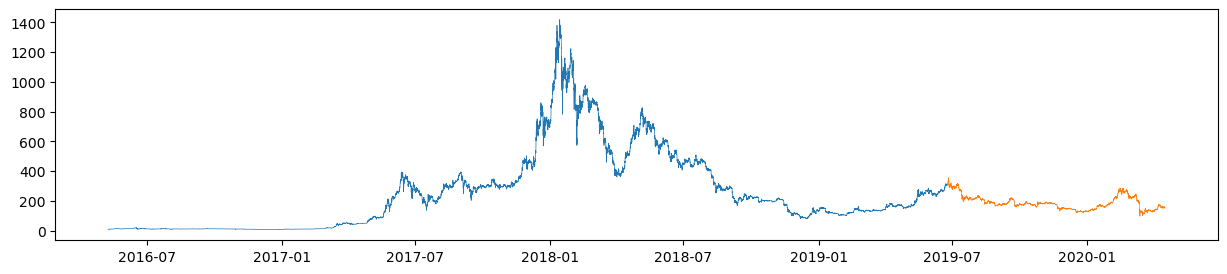

In [19]:
#plotting training and testing data
plt.figure(figsize=(15,3))
plt.plot(df['Close'][:split],label='Train',linewidth=0.5)
plt.plot(df['Close'][split:],label='Test',linewidth=0.5)

# Building a RNN model and traing

In [20]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from sklearn.metrics import *

In [21]:
model=Sequential()
model.add(LSTM(100,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mse')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train, Y_train, epochs=5, batch_size=100, verbose=1)

Epoch 1/5
275/275 [==============================] - 136s 480ms/step - loss: 0.0017
Epoch 2/5
275/275 [==============================] - 134s 490ms/step - loss: 2.7056e-04
Epoch 3/5
275/275 [==============================] - 122s 442ms/step - loss: 2.5593e-04
Epoch 4/5
275/275 [==============================] - 150s 546ms/step - loss: 2.2561e-04
Epoch 5/5
275/275 [==============================] - 153s 557ms/step - loss: 2.2047e-04


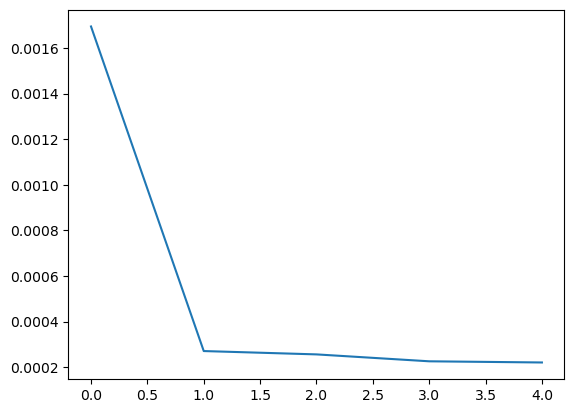

In [24]:
plt.plot(model.history.history['loss'])

In [25]:
pred_sc=model.predict(X_test)
pred=sc.inverse_transform(pred_sc)
Y_test_ic=sc.inverse_transform(Y_test)

215/215 [==============================] - 21s 94ms/step


The coefficient of determination (R-squared) = (:.3f) 0.9933330064751218


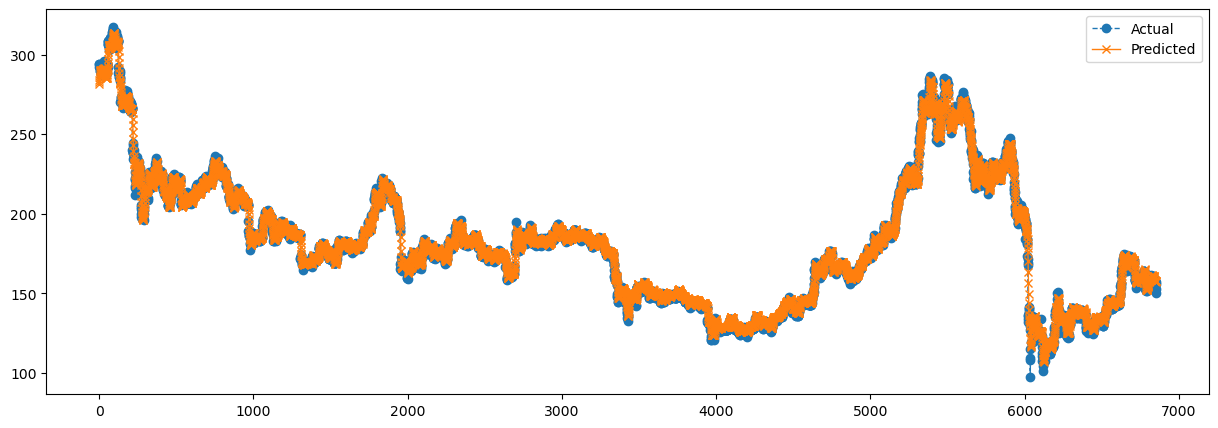

In [26]:
print('The coefficient of determination (R-squared) = (:.3f)',format(r2_score(pred,Y_test_ic)))

plt.figure(figsize=(15, 5))
plt.plot(Y_test_ic, label='Actual', linestyle='--', marker='o', linewidth=1)
plt.plot(pred, label='Predicted', linestyle='-', marker='x', linewidth=1)

plt.legend()
plt.show()

# Future Prediction

In [27]:
model=Sequential()
model.add(LSTM(100,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mse')

In [28]:
#training on entire dataset
X=windows_sc
Y=target_sc

model.fit(X,Y, epochs=5,batch_size=100, verbose=1)

Epoch 1/5
343/343 [==============================] - 191s 546ms/step - loss: 8.9739e-04
Epoch 2/5
343/343 [==============================] - 193s 562ms/step - loss: 2.4122e-04
Epoch 3/5
343/343 [==============================] - 194s 566ms/step - loss: 1.9214e-04
Epoch 4/5
343/343 [==============================] - 183s 533ms/step - loss: 1.7661e-04
Epoch 5/5
343/343 [==============================] - 177s 516ms/step - loss: 1.6050e-04


In [56]:
from datetime import datetime , timedelta
from tqdm import tqdm

str_d1="2020/04/16"
str_d2="2020/05/30"

#convert string to date onject
d1 = datetime.strptime(str_d1, "%Y/%m/%d")
d2 = datetime.strptime(str_d2, "%Y/%m/%d")
delta = d2 - d1
# Create a new timedelta with 24 days
steps_in_future = delta + timedelta(days=24)
print("Steps in future:", steps_in_future.days) 

Steps in future: 68


In [57]:
from datetime import datetime, timedelta
from tqdm import tqdm

# Convert the timedelta to an integer representing the number of days
steps_in_future = steps_in_future.days

f_wind = windows_sc[-1]
f_tar = target_sc[-1]
new = []

for i in tqdm(range(steps_in_future)):
    curr = np.append(f_wind[1:], [f_tar]).reshape(-1, 1)
    # Perform any necessary operations with curr
    # Append curr or use it as needed
    next_pred = model.predict(curr.reshape(1, length, 1))
    pred_ic = sc.inverse_transform(next_pred)
    new.append(pred_ic[0][0])
    f_wind = curr
    f_tar = next_pred

  0%|                                                                                           | 0/68 [00:00<?, ?it/s]

1/1 [==============================] - 0s 67ms/step


  3%|██▍                                                                                | 2/68 [00:00<00:06,  9.57it/s]

1/1 [==============================] - 0s 63ms/step


  4%|███▋                                                                               | 3/68 [00:00<00:07,  8.67it/s]

1/1 [==============================] - 0s 71ms/step


  6%|████▉                                                                              | 4/68 [00:00<00:08,  7.81it/s]

1/1 [==============================] - 0s 66ms/step


  7%|██████                                                                             | 5/68 [00:00<00:08,  7.27it/s]

1/1 [==============================] - 0s 66ms/step


  9%|███████▎                                                                           | 6/68 [00:00<00:08,  7.30it/s]

1/1 [==============================] - 0s 64ms/step


 10%|████████▌                                                                          | 7/68 [00:00<00:08,  7.35it/s]

1/1 [==============================] - 0s 68ms/step


 12%|█████████▊                                                                         | 8/68 [00:01<00:08,  7.19it/s]

1/1 [==============================] - 0s 58ms/step


 13%|██████████▉                                                                        | 9/68 [00:01<00:07,  7.41it/s]

1/1 [==============================] - 0s 67ms/step


 15%|████████████                                                                      | 10/68 [00:01<00:07,  7.51it/s]

1/1 [==============================] - 0s 67ms/step


 16%|█████████████▎                                                                    | 11/68 [00:01<00:07,  7.47it/s]

1/1 [==============================] - 0s 68ms/step


 18%|██████████████▍                                                                   | 12/68 [00:01<00:07,  7.51it/s]

1/1 [==============================] - 0s 66ms/step


 19%|███████████████▋                                                                  | 13/68 [00:01<00:07,  7.45it/s]

1/1 [==============================] - 0s 67ms/step


 21%|████████████████▉                                                                 | 14/68 [00:01<00:07,  7.33it/s]

1/1 [==============================] - 0s 71ms/step


 22%|██████████████████                                                                | 15/68 [00:01<00:07,  7.32it/s]

1/1 [==============================] - 0s 63ms/step


 24%|███████████████████▎                                                              | 16/68 [00:02<00:07,  7.29it/s]

1/1 [==============================] - 0s 67ms/step


 25%|████████████████████▌                                                             | 17/68 [00:02<00:06,  7.35it/s]

1/1 [==============================] - 0s 64ms/step


 26%|█████████████████████▋                                                            | 18/68 [00:02<00:06,  7.47it/s]

1/1 [==============================] - 0s 66ms/step


 28%|██████████████████████▉                                                           | 19/68 [00:02<00:06,  7.31it/s]

1/1 [==============================] - 0s 67ms/step


 29%|████████████████████████                                                          | 20/68 [00:02<00:06,  7.20it/s]

1/1 [==============================] - 0s 66ms/step


 31%|█████████████████████████▎                                                        | 21/68 [00:02<00:06,  7.34it/s]

1/1 [==============================] - 0s 69ms/step


 32%|██████████████████████████▌                                                       | 22/68 [00:02<00:06,  7.14it/s]

1/1 [==============================] - 0s 67ms/step


 34%|███████████████████████████▋                                                      | 23/68 [00:03<00:06,  7.15it/s]

1/1 [==============================] - 0s 67ms/step


 35%|████████████████████████████▉                                                     | 24/68 [00:03<00:06,  7.15it/s]

1/1 [==============================] - 0s 57ms/step


 37%|██████████████████████████████▏                                                   | 25/68 [00:03<00:05,  7.55it/s]

1/1 [==============================] - 0s 67ms/step


 38%|███████████████████████████████▎                                                  | 26/68 [00:03<00:05,  7.51it/s]

1/1 [==============================] - 0s 67ms/step


 40%|████████████████████████████████▌                                                 | 27/68 [00:03<00:05,  7.46it/s]

1/1 [==============================] - 0s 67ms/step


 41%|█████████████████████████████████▊                                                | 28/68 [00:03<00:05,  7.47it/s]

1/1 [==============================] - 0s 66ms/step


 43%|██████████████████████████████████▉                                               | 29/68 [00:03<00:05,  7.38it/s]

1/1 [==============================] - 0s 65ms/step


 44%|████████████████████████████████████▏                                             | 30/68 [00:04<00:05,  7.42it/s]

1/1 [==============================] - 0s 60ms/step


 46%|█████████████████████████████████████▍                                            | 31/68 [00:04<00:04,  7.51it/s]

1/1 [==============================] - 0s 66ms/step


 47%|██████████████████████████████████████▌                                           | 32/68 [00:04<00:04,  7.36it/s]

1/1 [==============================] - 0s 66ms/step


 49%|███████████████████████████████████████▊                                          | 33/68 [00:04<00:04,  7.31it/s]

1/1 [==============================] - 0s 65ms/step


 50%|█████████████████████████████████████████                                         | 34/68 [00:04<00:04,  7.28it/s]

1/1 [==============================] - 0s 65ms/step


 51%|██████████████████████████████████████████▏                                       | 35/68 [00:04<00:04,  7.31it/s]

1/1 [==============================] - 0s 65ms/step


 53%|███████████████████████████████████████████▍                                      | 36/68 [00:04<00:04,  7.25it/s]

1/1 [==============================] - 0s 62ms/step


 54%|████████████████████████████████████████████▌                                     | 37/68 [00:04<00:04,  7.23it/s]

1/1 [==============================] - 0s 63ms/step


 56%|█████████████████████████████████████████████▊                                    | 38/68 [00:05<00:04,  7.29it/s]

1/1 [==============================] - 0s 57ms/step


 57%|███████████████████████████████████████████████                                   | 39/68 [00:05<00:03,  7.48it/s]

1/1 [==============================] - 0s 56ms/step


 59%|████████████████████████████████████████████████▏                                 | 40/68 [00:05<00:03,  7.97it/s]

1/1 [==============================] - 0s 67ms/step


 60%|█████████████████████████████████████████████████▍                                | 41/68 [00:05<00:03,  8.04it/s]

1/1 [==============================] - 0s 65ms/step


 62%|██████████████████████████████████████████████████▋                               | 42/68 [00:05<00:03,  7.92it/s]

1/1 [==============================] - 0s 67ms/step


 63%|███████████████████████████████████████████████████▊                              | 43/68 [00:05<00:03,  7.74it/s]

1/1 [==============================] - 0s 67ms/step


 65%|█████████████████████████████████████████████████████                             | 44/68 [00:05<00:03,  7.70it/s]

1/1 [==============================] - 0s 66ms/step


 66%|██████████████████████████████████████████████████████▎                           | 45/68 [00:06<00:03,  7.59it/s]

1/1 [==============================] - 0s 67ms/step


 68%|███████████████████████████████████████████████████████▍                          | 46/68 [00:06<00:02,  7.66it/s]

1/1 [==============================] - 0s 66ms/step


 69%|████████████████████████████████████████████████████████▋                         | 47/68 [00:06<00:02,  7.63it/s]

1/1 [==============================] - 0s 63ms/step


 71%|█████████████████████████████████████████████████████████▉                        | 48/68 [00:06<00:02,  7.55it/s]

1/1 [==============================] - 0s 68ms/step


 72%|███████████████████████████████████████████████████████████                       | 49/68 [00:06<00:02,  7.32it/s]

1/1 [==============================] - 0s 60ms/step


 74%|████████████████████████████████████████████████████████████▎                     | 50/68 [00:06<00:02,  7.36it/s]

1/1 [==============================] - 0s 65ms/step


 75%|█████████████████████████████████████████████████████████████▌                    | 51/68 [00:06<00:02,  7.50it/s]

1/1 [==============================] - 0s 67ms/step


 76%|██████████████████████████████████████████████████████████████▋                   | 52/68 [00:06<00:02,  7.46it/s]

1/1 [==============================] - 0s 64ms/step


 78%|███████████████████████████████████████████████████████████████▉                  | 53/68 [00:07<00:02,  7.44it/s]

1/1 [==============================] - 0s 63ms/step


 79%|█████████████████████████████████████████████████████████████████                 | 54/68 [00:07<00:01,  7.41it/s]

1/1 [==============================] - 0s 67ms/step


 81%|██████████████████████████████████████████████████████████████████▎               | 55/68 [00:07<00:01,  7.57it/s]

1/1 [==============================] - 0s 67ms/step


 82%|███████████████████████████████████████████████████████████████████▌              | 56/68 [00:07<00:01,  7.46it/s]

1/1 [==============================] - 0s 66ms/step


 84%|████████████████████████████████████████████████████████████████████▋             | 57/68 [00:07<00:01,  7.56it/s]

1/1 [==============================] - 0s 63ms/step


 85%|█████████████████████████████████████████████████████████████████████▉            | 58/68 [00:07<00:01,  7.50it/s]

1/1 [==============================] - 0s 63ms/step


 87%|███████████████████████████████████████████████████████████████████████▏          | 59/68 [00:08<00:02,  4.37it/s]

1/1 [==============================] - 0s 64ms/step


 88%|████████████████████████████████████████████████████████████████████████▎         | 60/68 [00:08<00:01,  5.00it/s]

1/1 [==============================] - 0s 64ms/step


 90%|█████████████████████████████████████████████████████████████████████████▌        | 61/68 [00:08<00:01,  5.52it/s]

1/1 [==============================] - 0s 61ms/step


 91%|██████████████████████████████████████████████████████████████████████████▊       | 62/68 [00:08<00:01,  5.99it/s]

1/1 [==============================] - 0s 62ms/step


 93%|███████████████████████████████████████████████████████████████████████████▉      | 63/68 [00:08<00:00,  6.37it/s]

1/1 [==============================] - 0s 65ms/step


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 64/68 [00:08<00:00,  6.73it/s]

1/1 [==============================] - 0s 65ms/step


 96%|██████████████████████████████████████████████████████████████████████████████▍   | 65/68 [00:09<00:00,  6.98it/s]

1/1 [==============================] - 0s 64ms/step


 97%|███████████████████████████████████████████████████████████████████████████████▌  | 66/68 [00:09<00:00,  7.08it/s]

1/1 [==============================] - 0s 64ms/step


 99%|████████████████████████████████████████████████████████████████████████████████▊ | 67/68 [00:09<00:00,  7.01it/s]

1/1 [==============================] - 0s 67ms/step


100%|██████████████████████████████████████████████████████████████████████████████████| 68/68 [00:09<00:00,  7.21it/s]


 ## new=sc.inverse_transform(np.array(new).reshape(-1,1))

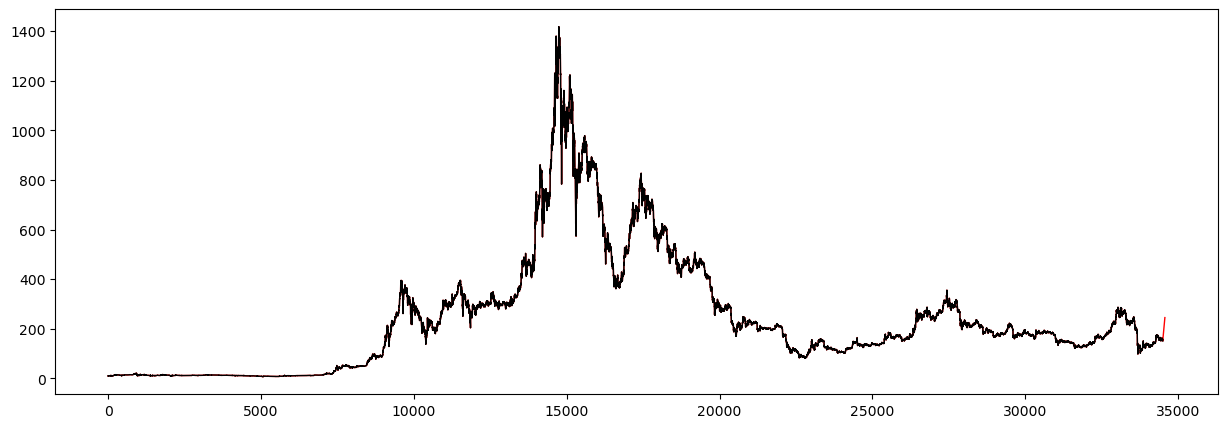

In [58]:
out=[]
out=np.append(df.Close.values,new)
plt.figure(figsize=(15,5))
plt.plot(out,linewidth=1,color='red')
plt.plot(df.Close.values,linewidth=1,color='black')
plt.show()

In [59]:
len(out),len(df.Close)

(34565, 34497)

In [60]:
import pickle

model.save('model.h5')
filename='scaler.pkl'
f=open(filename,'wb')
pickle.dump(sc,f)
f.close()

In [61]:
with open('windows.npy','wb') as f:
    np.save(f,windows_sc)
with open('target.npy','wb') as f:
    np.save(f,target_sc)